In [88]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score

In [2]:
# Spécifiez le chemin du fichier .dat
fichier_dat = "dataset.dat"

In [3]:
# Lisez le fichier .dat 
data = pd.read_csv(fichier_dat)
data.head()

,TIMESTAMP,deplacement,ensoleillement,temperature
0,2020-03-14 00:01:22,1.3,0.0,8.381906
1,2020-03-14 00:18:05,0.5,0.0,8.388235
2,2020-03-14 00:35:17,1.8,0.0,8.397227
3,2020-03-14 00:52:39,NAN,0.0,8.411952
4,2020-03-14 01:09:27,1.7,0.0,8.426197


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1848 entries, 0 to 1847
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TIMESTAMP       1848 non-null   object 
 1   deplacement     1848 non-null   object 
 2   ensoleillement  1848 non-null   float64
 3   temperature     1848 non-null   float64
dtypes: float64(2), object(2)
memory usage: 57.9+ KB


In [5]:
data.describe()

,ensoleillement,temperature
count,1848.000000,1848.000000
mean,249.395960,10.203553
std,371.006511,4.852275
min,0.000000,-0.044735
25%,0.000000,7.028316
50%,26.225605,9.576200
75%,386.176157,12.832483
max,1378.804382,27.206300


In [6]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f"{column}: {unique_values}")

TIMESTAMP: ['2020-03-14 00:01:22' '2020-03-14 00:18:05' '2020-03-14 00:35:17' ...
 '2020-04-06 05:28:55' '2020-04-06 05:46:51' '2020-04-06 06:04:49']
deplacement: ['1.3' '0.5' '1.8' 'NAN' '1.7' '1.9' '2.0' '2.2' '2.1' '2.3' '1.5' '0.1'
 '-0.3' '1.4' '-0.8' '0.0' '-1.0' '-1.2' '0.6' '-0.4' '-0.7' '-0.2' '-1.4'
 '-1.6' '-2.0' '-1.1' '-1.9' '-0.5' '-0.1' '0.2' '0.4' '0.8' '1.1' '0.9'
 '1.0' '2.4' '2.5' '2.6' '2.8' '0.7' '-2.5' '-0.9' '-2.8' '-2.2' '-2.9'
 '-3.9' '-3.8' '-3.7' '-4.0' '-3.5' '-3.3' '-3.1' '-2.1' '-2.4' '-0.6'
 '0.3' '1.6' '1.2' '-2.3' '-2.6' '-3.0' '-3.4' '-4.4' '-4.6' '-3.2' '-3.6'
 '-1.8' '-1.5' '-4.1' '-4.2' '-4.8' '-4.5' '-2.7' '-1.3' '2.9' '3.1' '3.4'
 '2.7' '-1.7' '-4.7' '-5.0' '-5.9' '-6.3' '-5.3' '-6.4' '-5.6' '-5.4'
 '-6.1' '-5.7' '-4.3' '-6.7' '-5.2' '-5.5' '-4.9' '3.0' '3.2' '-5.1' '3.3'
 '3.5' '3.6' '3.8' '3.9' '-5.8' '4.0' '-6.2' '-6.9' '-6.0' '-6.5' '4.5'
 '-7.7' '-7.3' '-7.4' '-7.2' '-7.1' '-6.6' '-7.0' '-7.6']
ensoleillement: [ 0.          3.78637175 11.4927

In [7]:
# En type datetime
data["TIMESTAMP"] = pd.to_datetime(data["TIMESTAMP"])


In [8]:
# colonne "deplacement" en type float
data["deplacement"] = pd.to_numeric(data["deplacement"], errors="coerce")

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1848 entries, 0 to 1847
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TIMESTAMP       1848 non-null   datetime64[ns]
 1   deplacement     1761 non-null   float64       
 2   ensoleillement  1848 non-null   float64       
 3   temperature     1848 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 57.9 KB


In [10]:
data.isnull().sum()

TIMESTAMP          0
deplacement       87
ensoleillement     0
temperature        0
dtype: int64

In [11]:
#remplacer les valeurs nulles par la médiane 
median_value = data['deplacement'].median()
data['deplacement'].fillna(median_value, inplace=True)

On remplace par la médiane car c'est  une mesure de tendance centrale qui n'est pas sensible aux valeurs extrêmes.En utilisant la médiane pour remplacer les valeurs manquantes, on préserve la tendance générale des valeurs non nulles de la colonne "deplacement".

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1848 entries, 0 to 1847
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TIMESTAMP       1848 non-null   datetime64[ns]
 1   deplacement     1848 non-null   float64       
 2   ensoleillement  1848 non-null   float64       
 3   temperature     1848 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 57.9 KB


In [13]:
# Extraction des données pertinentes
deplacement = data['deplacement']
ensoleillement = data['ensoleillement']
temperature = data['temperature']

In [93]:
data

,TIMESTAMP,deplacement,ensoleillement,temperature
0,2020-03-14 00:01:22,1.3,0.0,8.381906
1,2020-03-14 00:18:05,0.5,0.0,8.388235
2,2020-03-14 00:35:17,1.8,0.0,8.397227
3,2020-03-14 00:52:39,0.5,0.0,8.411952
4,2020-03-14 01:09:27,1.7,0.0,8.426197
...,...,...,...,...
1843,2020-04-06 04:53:10,2.0,0.0,13.979392
1844,2020-04-06 05:11:04,2.1,0.0,13.866014
1845,2020-04-06 05:28:55,2.4,0.0,13.752952
1846,2020-04-06 05:46:51,2.2,0.0,13.772561


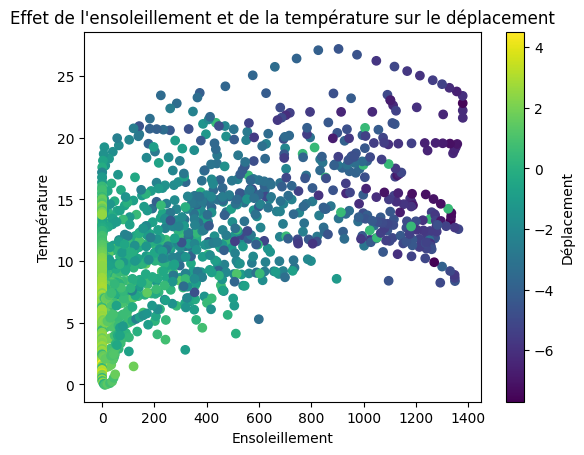

In [45]:
# Création du scatter plot
plt.scatter(ensoleillement, temperature, c=deplacement, cmap='viridis')
plt.colorbar(label='Déplacement')
plt.xlabel('Ensoleillement')
plt.ylabel('Température')
plt.title('Effet de l\'ensoleillement et de la température sur le déplacement')
plt.show()

In [16]:
# la matrice de corrélation avec le coefficient de corrélation de Pearson
corr_matrix = data.corr(method='pearson', numeric_only=True)

In [17]:

print("Matrice de corrélation :")
corr_matrix

Matrice de corrélation :


,deplacement,ensoleillement,temperature
deplacement,1.000000,-0.866542,-0.724366
ensoleillement,-0.866542,1.000000,0.595670
temperature,-0.724366,0.595670,1.000000


<Axes: >

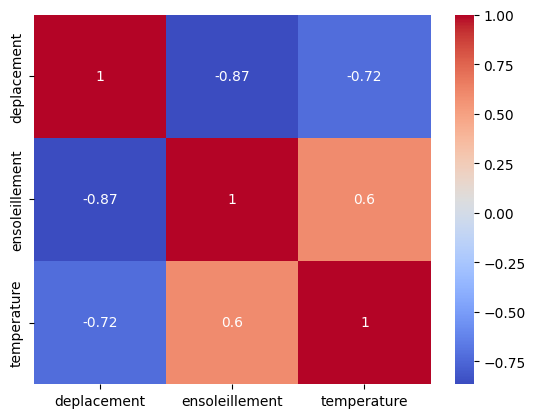

In [20]:
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

In [18]:
# Affichage des corrélations les plus significatives
significant_correlations = corr_matrix[abs(corr_matrix) > 0.5]
significant_correlations = significant_correlations[significant_correlations < 1]
significant_correlations.dropna(how='all', axis=0, inplace=True)
significant_correlations.dropna(how='all', axis=1, inplace=True)
print("Corrélations significatives :")
print(significant_correlations)

Corrélations significatives :
                deplacement  ensoleillement  temperature
deplacement             NaN       -0.866542    -0.724366
ensoleillement    -0.866542             NaN     0.595670
temperature       -0.724366        0.595670          NaN



Les corrélations significatives dans cet exemple sont les suivantes :

Entre la variable "deplacement" et "ensoleillement", la corrélation est de -0.866542.
Entre la variable "deplacement" et "temperature", la corrélation est de -0.724366.
Entre la variable "ensoleillement" et "temperature", la corrélation est de 0.595670.

Ces résultats soulignent donc une relation inverse entre le déplacement et l'ensoleillement, ainsi qu'entre le déplacement et la température. En revanche, il existe une relation positive modérée entre l'ensoleillement et la température. Ces chiffres décrivent la force et la direction de la relation linéaire entre les variables, permettant ainsi de comprendre les liens entre elles.

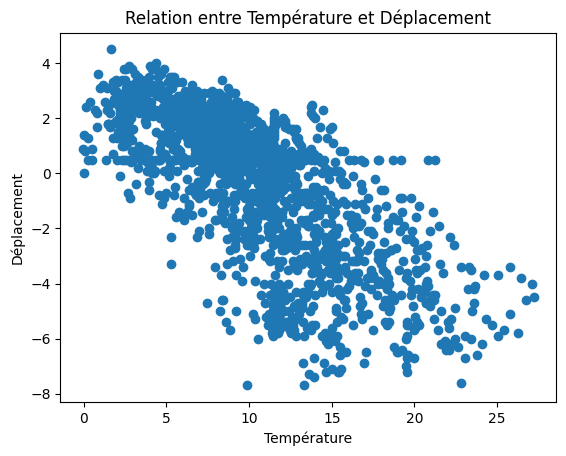

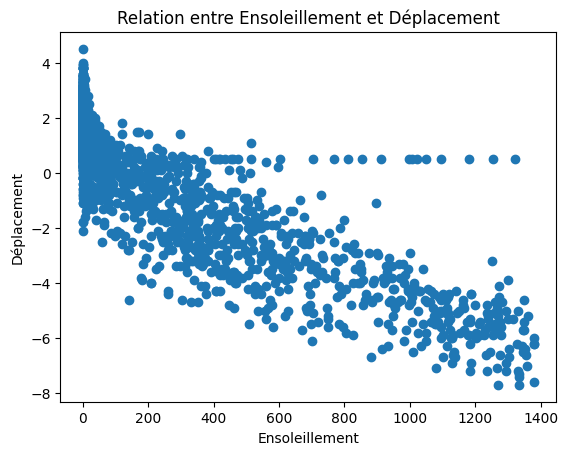

In [21]:
# Scatter 
plt.scatter(data["temperature"], data["deplacement"])
plt.xlabel("Température")
plt.ylabel("Déplacement")
plt.title("Relation entre Température et Déplacement")
plt.show()

plt.scatter(data["ensoleillement"], data["deplacement"])
plt.xlabel("Ensoleillement")
plt.ylabel("Déplacement")
plt.title("Relation entre Ensoleillement et Déplacement")
plt.show()

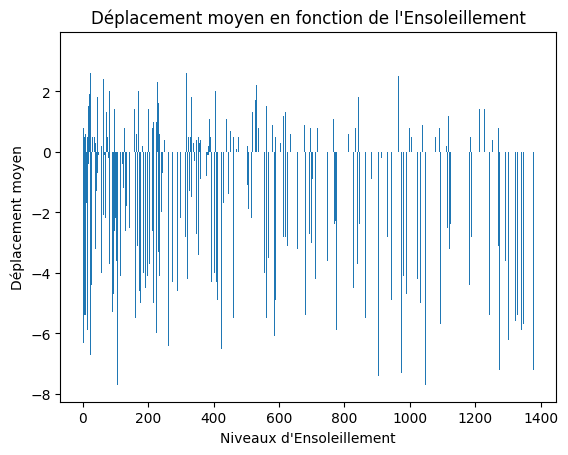

In [38]:
# Diagramme en barres
ensoleillement_categories = data["ensoleillement"].unique()
deplacement_moyen = data.groupby("ensoleillement")["deplacement"].mean()

plt.bar(ensoleillement_categories, deplacement_moyen)
plt.xlabel("Niveaux d'Ensoleillement")
plt.ylabel("Déplacement moyen")
plt.title("Déplacement moyen en fonction de l'Ensoleillement")
plt.show()

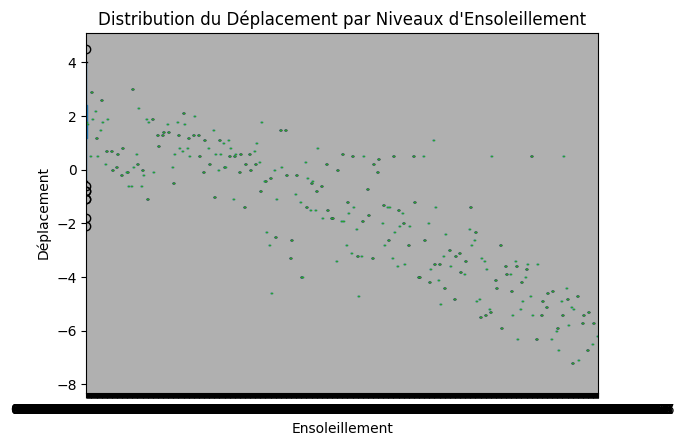

In [22]:
# Diagramme en boîtes
data.boxplot(column="deplacement", by="ensoleillement")
plt.xlabel("Ensoleillement")
plt.ylabel("Déplacement")
plt.title("Distribution du Déplacement par Niveaux d'Ensoleillement")
plt.suptitle("")
plt.show()

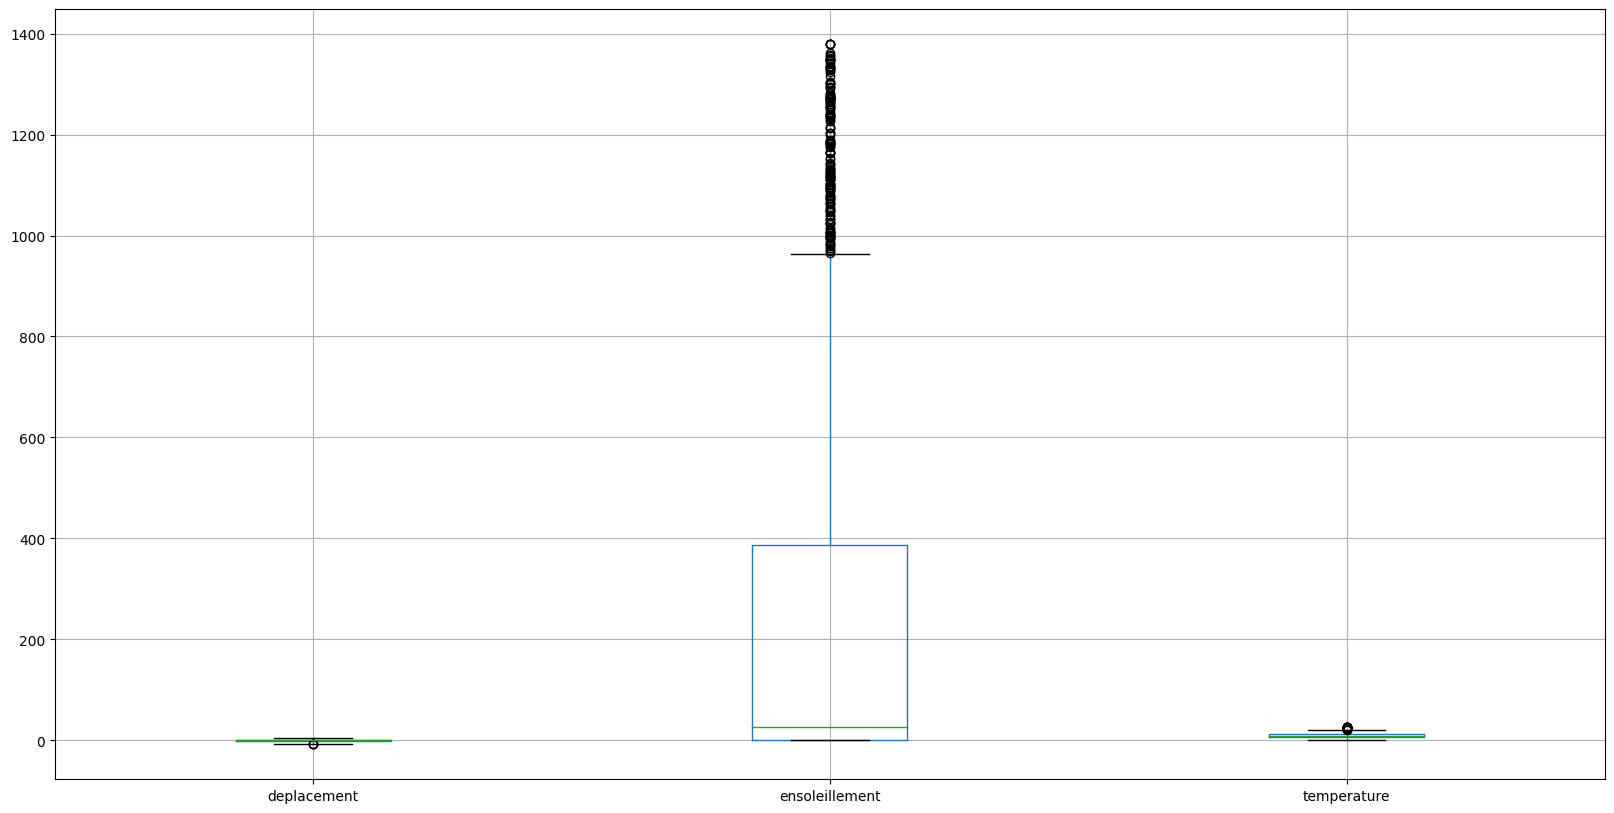

In [23]:
boxplot = data.boxplot(figsize=(20,10))

Dans le cadre de notre étude qualitative et quantitative des corrélations entre les variables, nous avons analysé les données de déplacement, ensoleillement et température. Les corrélations les plus significatives que nous avons identifiées sont les suivantes :

•	Corrélation négative entre le déplacement et l'ensoleillement : Nous avons observé une corrélation négative forte (-0.866542) entre le déplacement et l'ensoleillement. Cela indique qu'une augmentation de l'ensoleillement est généralement associée à une diminution du déplacement des structures.
•	Corrélation négative entre le déplacement et la température : Nous avons également constaté une corrélation négative (-0.724366) entre le déplacement et la température. Cela suggère que lorsque la température augmente, le déplacement des structures a tendance à diminuer.
•	Corrélation positive entre l'ensoleillement et la température : Nous avons observé une corrélation positive (0.595670) entre l'ensoleillement et la température. Cela signifie que lorsque l'ensoleillement augmente, la température a tendance à augmenter également.


Pour mieux comprendre ces relations, nous avons tracé des scatter plots, qui nous ont permis de visualiser la dispersion des données et d'observer la tendance générale des corrélations. De plus, nous avons utilisé des diagrammes en boîtes pour représenter la distribution des valeurs du déplacement en fonction des niveaux d'ensoleillement et de température.

Ces résultats préliminaires nous permettent de mieux appréhender l'effet de l'ensoleillement et de la température sur le déplacement des structures. Cependant, il est important de poursuivre l'analyse afin d'obtenir une compréhension plus approfondie et de tirer des conclusions plus précises.

## un modèle prédictif

Dans notre étude sur l'effet de l'ensoleillement et de la température sur les structures, nous développons un modèle prédictif en utilisant des techniques de machine learning telles que la régression linéaire, les réseaux de neurones et les arbres de décision.

Dans un premier temps nous allons réaliser une étude on se base sur le modèle de régression linéaire multiple

La régression linéaire multiple est une approche adaptée pour étudier l'impact de l'ensoleillement et de la température sur le déplacement des structures, en quantifiant leur relation et permettant des prédictions basées sur ces variables.

En plus régression linéaire multiple est une approche polyvalente pour étudier l'impact de l'ensoleillement et de la température sur le déplacement des structures. Elle permet d'ajuster le modèle en incluant d'autres variables pertinentes, fournissant ainsi une analyse plus complète et des prédictions précises pour les facteurs influençant le déplacement des structures. 


 vérifier les conditions d'application de la régression linéaire multiple

In [24]:

X = data[['ensoleillement', 'temperature']]
y = data['deplacement']

In [25]:
# Ajouter une colonne de constante pour estimer l'intercept dans la régression linéaire
X = sm.add_constant(X)

In [26]:
# Créer le modèle de régression linéaire multiple
model = sm.OLS(y, X)

In [30]:
# Entraîner le modèle
results = model.fit()

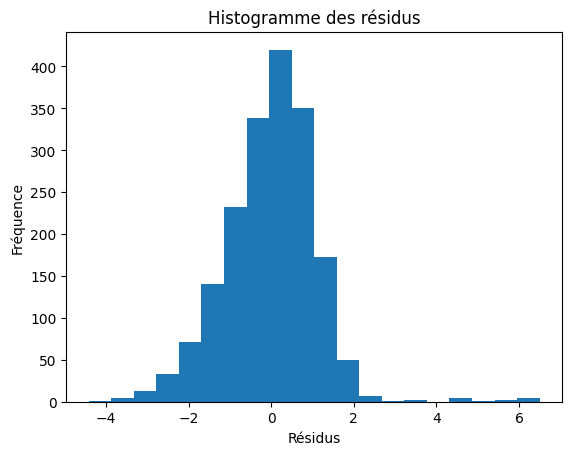

In [31]:

residuals = results.resid
presiduals = results.resid
plt.hist(residuals, bins=20)
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.title('Histogramme des résidus')
plt.show()

In [32]:
# Effectuer des tests de normalité des résidus (par exemple, le test de Shapiro-Wilk)
p_value = stats.shapiro(residuals)[1]
print("p-value du test de Shapiro-Wilk :", p_value)

p-value du test de Shapiro-Wilk : 1.1002593930448094e-22


Cela indique que les résidus ne suivent pas une distribution normale. 
Lorsque la p-value est inférieure à un niveau de signification prédéterminé (par exemple, 0.05), on peut conclure que les résidus ne sont pas normalement distribués. Cela peut avoir des implications sur les propriétés de l'estimation et des tests statistiques associés à la régression linéaire multiple

Outre la régression linéaire multiple, la régression polynomiale peut être utilisée pour capturer des relations non linéaires entre les variables en élevant les variables d'origine à des puissances plus élevées. Cette approche permet de modéliser des formes de relation plus complexes entre l'ensoleillement, la température et le déplacement.

## linéaire multiple

In [33]:
# Séparation des variables indépendantes et de la variable dépendante
X = data[['ensoleillement', 'temperature']]
y_lm = data['deplacement']

In [34]:
# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Création du modèle de régression linéaire multiple
model = LinearRegression()

In [37]:
# Entraînement du modèle sur les données d'entraînement
model.fit(X_train, y_train)

LinearRegression()

In [39]:
# Prédiction sur les données de test
y_pred = model.predict(X_test)

In [40]:
# Évaluation du modèle en utilisant la métrique de l'erreur quadratique moyenne (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

RMSE: 1.1205005818616887


In [41]:
r2_score = model.score(X, y)

Text(0, 0.5, 'Résidus')

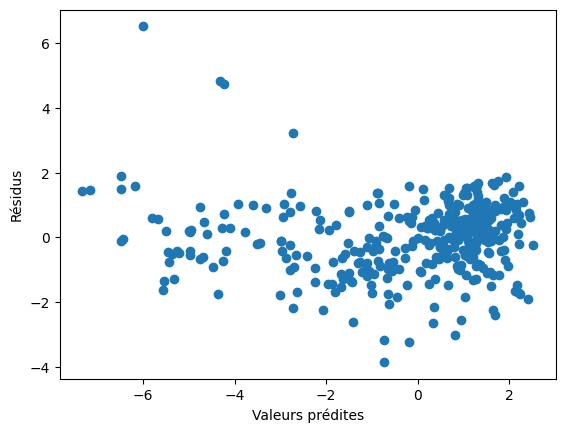

In [42]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Valeurs prédites')
plt.ylabel('Résidus')

In [100]:
p_value = stats.shapiro(residuals)[1]
print("p-value du test de Shapiro-Wilk :", p_value)

p-value du test de Shapiro-Wilk : 1.1002593930448094e-22


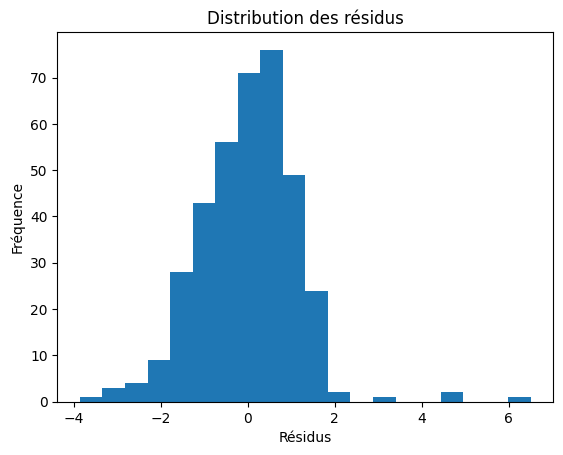

In [105]:
plt.hist(residuals, bins=20)
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.title('Distribution des résidus')
plt.show()

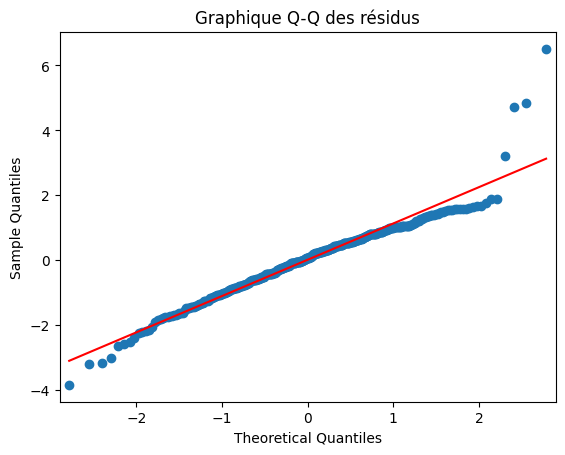

In [43]:

sm.qqplot(residuals, line='s')
plt.title('Graphique Q-Q des résidus')
plt.show()

Ces visualisations fournissent des indications positives quant à l'hypothèse de normalité des résidus. Lorsque les résidus suivent approximativement une distribution normale, l'histogramme présente une forme de cloche et les points du graphique Q-Q sont alignés avec la ligne de référence. Ces observations suggèrent une conformité aux attentes de normalité des résidus.

En peux 

# optimiser les hyperparamètres 

In [99]:

param_grid = {'normalize': [True, False]}


In [65]:
# Création du modèle de régression linéaire
model = LinearRegression()

In [66]:
# Recherche par grille avec validation croisée
grid_search = GridSearchCV(model, param_grid, cv=5)

In [67]:
# Entraînement du modèle sur les données d'entraînement
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(), param_grid={})

In [69]:
best_score = grid_search.best_score_
print("Meilleur score :", best_score)

Meilleur score : 0.820137368382397



Le score de 0.82 obtenu lors de l'optimisation des hyperparamètres pour le modèle de régression linéaire indique une performance de 82.01% sur les données d'entraînement, expliquant ainsi environ 82% de la variance. Cependant, il est essentiel d'évaluer les performances sur des données de test indépendantes pour une estimation plus fiable de la capacité du modèle à généraliser.

In [ ]:
# Entraînement et évaluation du modèle de régression linéaire multiple
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_test)
r2_linear = r2_score(y_test, y_pred_linear)
rmse_linear = mean_squared_error(y_test, y_pred_linear, squared=False)

# régression polynomiale

In [45]:
# Vérification de l'homoscédasticité
# Entraînement du modèle de régression polynomiale
X_poly = sm.add_constant(X)
model = sm.OLS(y, X_poly).fit()


In [46]:
# Calcul des résidus
residuals2 = model.resid

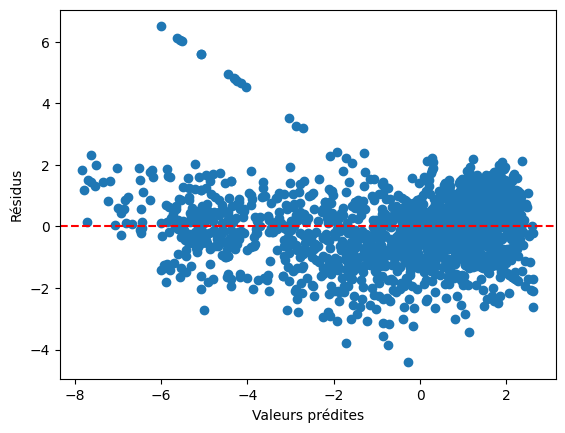

In [75]:
# Tracé des résidus en fonction des valeurs prédites
plt.scatter(model.predict(), residuals2)
plt.xlabel('Valeurs prédites')
plt.ylabel('Résidus')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [76]:
p_value = stats.shapiro(residuals2)[1]
print("p-value du test de Shapiro-Wilk :", p_value)

p-value du test de Shapiro-Wilk : 1.1002593930448094e-22


In [77]:
# Vérification des observations influentes ou aberrantes
influence = model.get_influence()
leverage = influence.hat_matrix_diag
cook_distance = influence.cooks_distance[0]

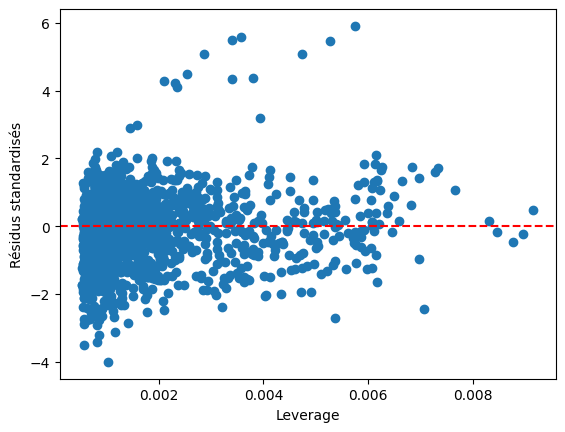

In [78]:
#  graphique des résidus standardisés en fonction du leverage
plt.scatter(leverage, influence.resid_studentized_internal)
plt.xlabel('Leverage')
plt.ylabel('Résidus standardisés')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


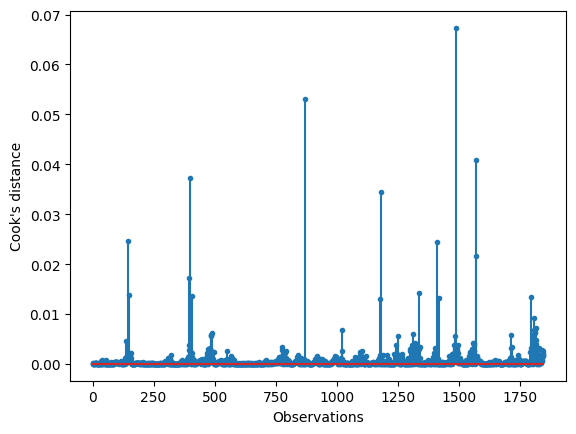

In [73]:
# Tracé du graphique de Cook's distance
plt.stem(cook_distance, markerfmt='.')
plt.xlabel('Observations')
plt.ylabel("Cook's distance")
plt.show()

In [80]:
y_pred = model.predict(X)  # X represents the independent variables used for prediction
residuals = y - y_pred  # y represents the actual dependent variable values

Text(0, 0.5, 'Résidus')

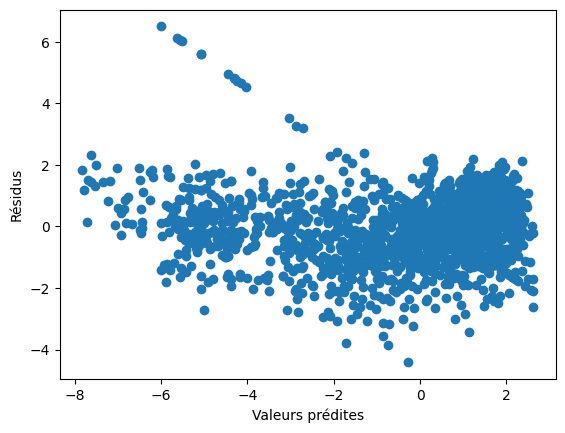

In [81]:
# Tracé du graphique des valeurs prédites par rapport aux résidus
plt.scatter(y_pred, residuals)
plt.xlabel('Valeurs prédites')
plt.ylabel('Résidus')

Text(0, 0.5, 'Résidus')

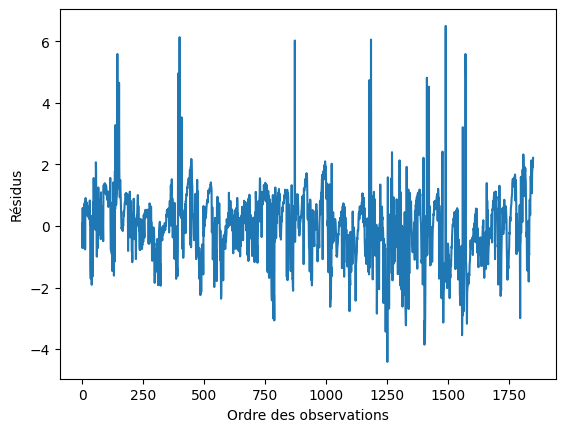

In [83]:
# Tracé du graphique des résidus en fonction du temps (ou de l'ordre des observations)
plt.plot(range(len(residuals)), residuals)
plt.xlabel('Ordre des observations')
plt.ylabel('Résidus')

In [76]:
# Création des variables polynomiales
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [77]:

model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [78]:
# Prédictions sur les données de test
y_pred = model.predict(X_test_poly)

In [79]:
# Évaluation du modèle
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

In [80]:
print("Coefficient de détermination (R²) :", r2)
print("Erreur quadratique moyenne (RMSE) :", rmse)

Coefficient de détermination (R²) : 0.8198139116969356
Erreur quadratique moyenne (RMSE) : 1.0550803335617311


In [82]:
# Entraînement et évaluation du modèle de régression linéaire polynomiale
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)
y_pred_poly = model_poly.predict(X_test_poly)
r2_poly = r2_score(y_test, y_pred_poly)
rmse_poly = mean_squared_error(y_test, y_pred_poly, squared=False)

In [98]:
# Comparaison des performances
print("Performances du modèle de régression linéaire multiple :")
print("Coefficient de détermination (R²) :", r2_linear)
print("Erreur quadratique moyenne (RMSE) :", rmse_linear)
print()
print("Performances du modèle de régression linéaire polynomiale :")
print("Coefficient de détermination (R²) :", r2_poly)
print("Erreur quadratique moyenne (RMSE) :", rmse_poly)


Performances du modèle de régression linéaire multiple :
Coefficient de détermination (R²) : 0.7967762906661734
Erreur quadratique moyenne (RMSE) : 1.1205005818616887

Performances du modèle de régression linéaire polynomiale :
Coefficient de détermination (R²) : 0.8198139116969356
Erreur quadratique moyenne (RMSE) : 1.0550803335617311



Le modèle de régression linéaire polynomiale présente de meilleures performances que le modèle de régression linéaire multiple. Il explique une plus grande proportion de la variance des données et a une erreur moyenne légèrement inférieure. Cependant, l'amélioration des performances n'est pas très significative.